In [91]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [92]:
# Import dataset
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [93]:
# Merge datasets 
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

In [94]:
# Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [95]:
# Handle duplicates
merged_data.drop_duplicates(inplace=True)

In [96]:
# Summary Statistics
print("\nSummary Statistics:")
print(merged_data.describe(include="all"))


Summary Statistics:
       TransactionID CustomerID ProductID      TransactionDate     Quantity  \
count           1000       1000      1000                 1000  1000.000000   
unique          1000        199       100                 1000          NaN   
top           T00001      C0109      P059  2024-08-25 12:38:23          NaN   
freq               1         11        19                    1          NaN   
mean             NaN        NaN       NaN                  NaN     2.537000   
std              NaN        NaN       NaN                  NaN     1.117981   
min              NaN        NaN       NaN                  NaN     1.000000   
25%              NaN        NaN       NaN                  NaN     2.000000   
50%              NaN        NaN       NaN                  NaN     3.000000   
75%              NaN        NaN       NaN                  NaN     4.000000   
max              NaN        NaN       NaN                  NaN     4.000000   

         TotalValue     Price_

In [97]:
# Exploratory Analysis
# Most purchased products
most_purchased_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("\nMost Purchased Products:")
print(most_purchased_products)


Most Purchased Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


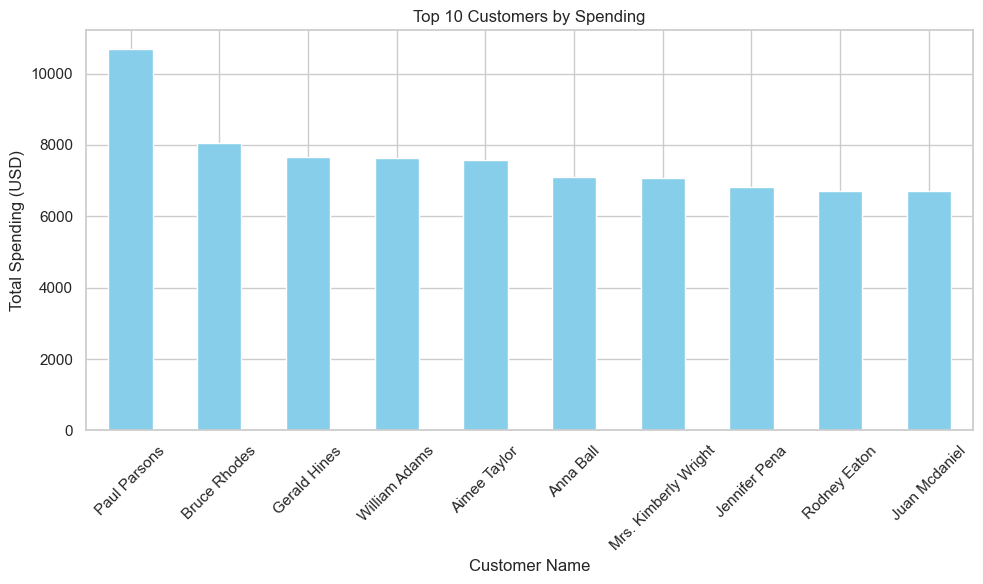

In [98]:
# Top 10 Customers by Spending
customer_spending = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
customer_spending.plot(kind="bar", color="skyblue")
plt.title("Top 10 Customers by Spending")
plt.ylabel("Total Spending (USD)")
plt.xlabel("Customer Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

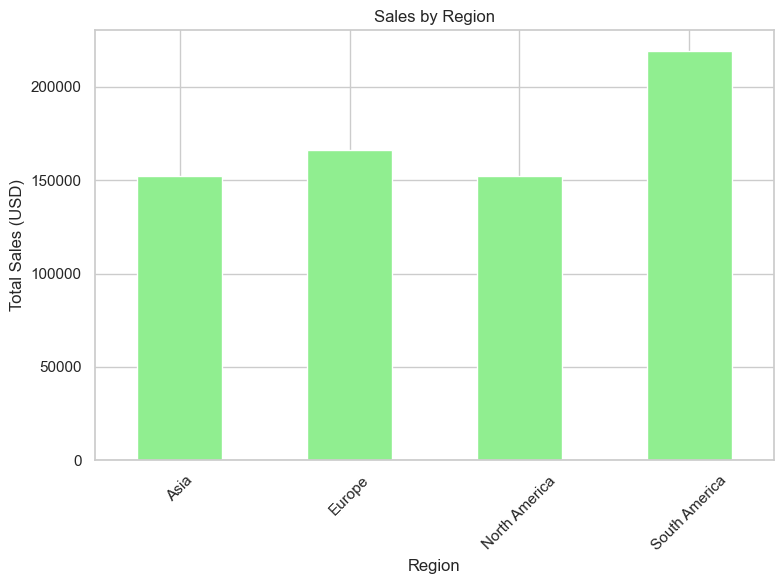

In [99]:
# Sales by Region
sales_by_region = merged_data.groupby("Region")["TotalValue"].sum()
plt.figure(figsize=(8, 6))
sales_by_region.plot(kind="bar", color="lightgreen")
plt.title("Sales by Region")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

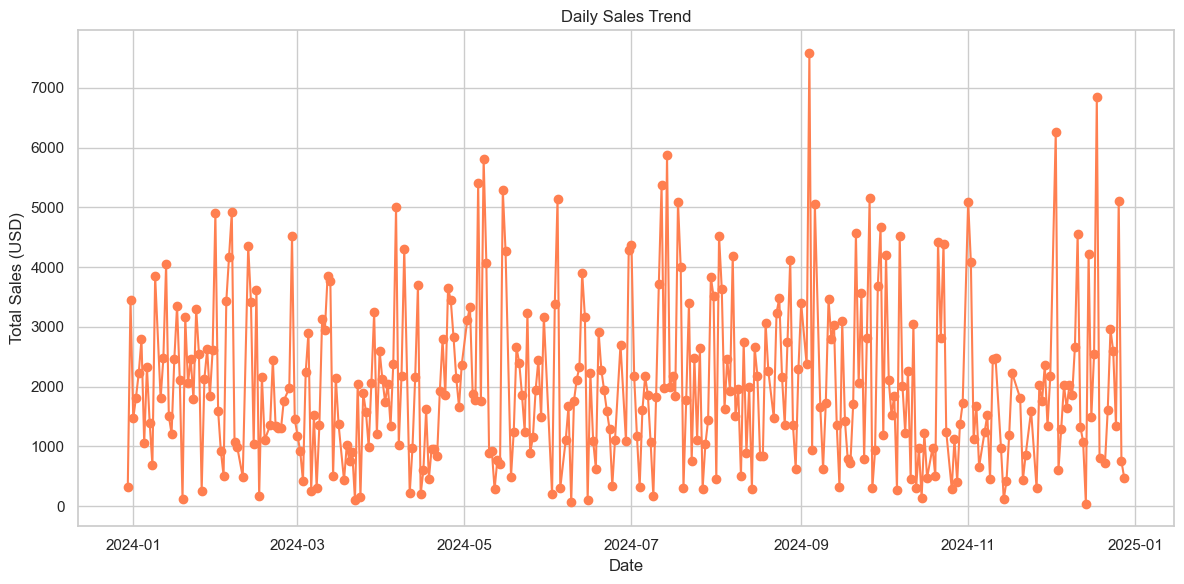

In [100]:
# Daily Sales Trend
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
daily_sales = merged_data.groupby(merged_data["TransactionDate"].dt.date)["TotalValue"].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker="o", linestyle="-", color="coral")
plt.title("Daily Sales Trend")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

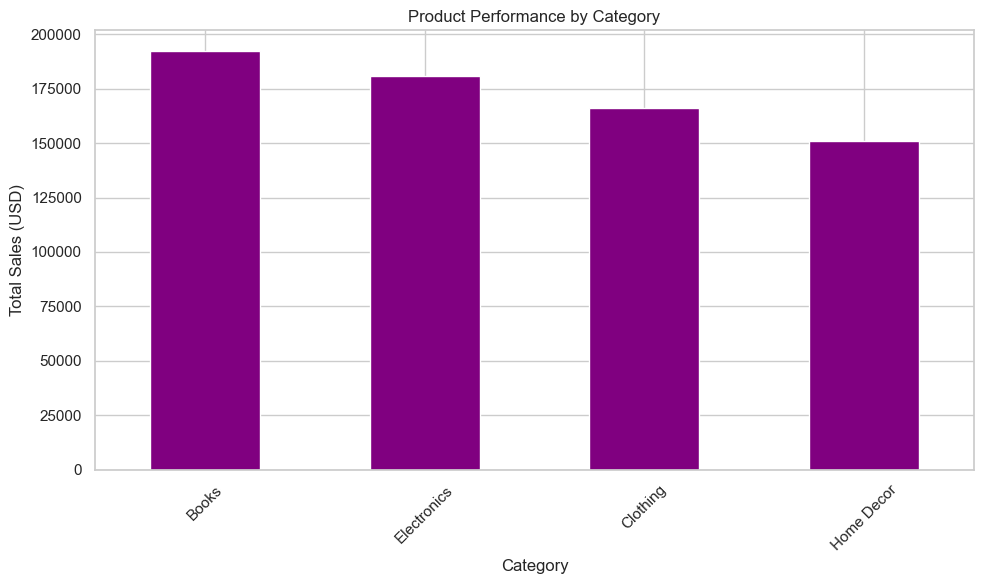

In [101]:
# Product Performance by Category
category_performance = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_performance.plot(kind="bar", color="purple")
plt.title("Product Performance by Category")
plt.ylabel("Total Sales (USD)")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

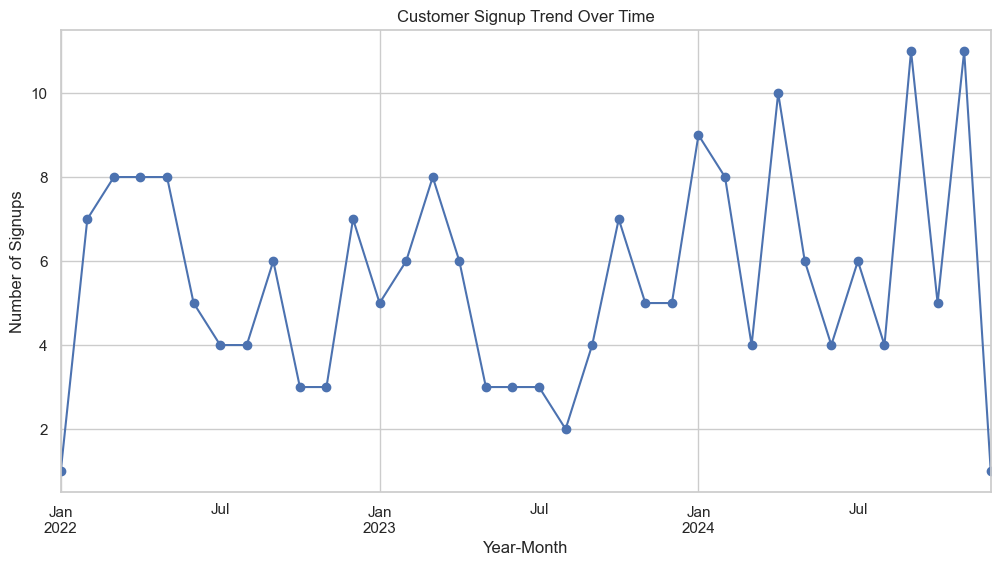

In [102]:
# Ensure SignupDate is in datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], errors='coerce')

# Extract Year-Month from SignupDate
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')

# Calculate signup trends
signup_trend = customers['SignupYearMonth'].value_counts().sort_index()

# Plot the trends
plt.figure(figsize=(12, 6))
signup_trend.plot(kind="line", marker="o", color="b", linestyle="-")
plt.title("Customer Signup Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.grid(True)
plt.show()

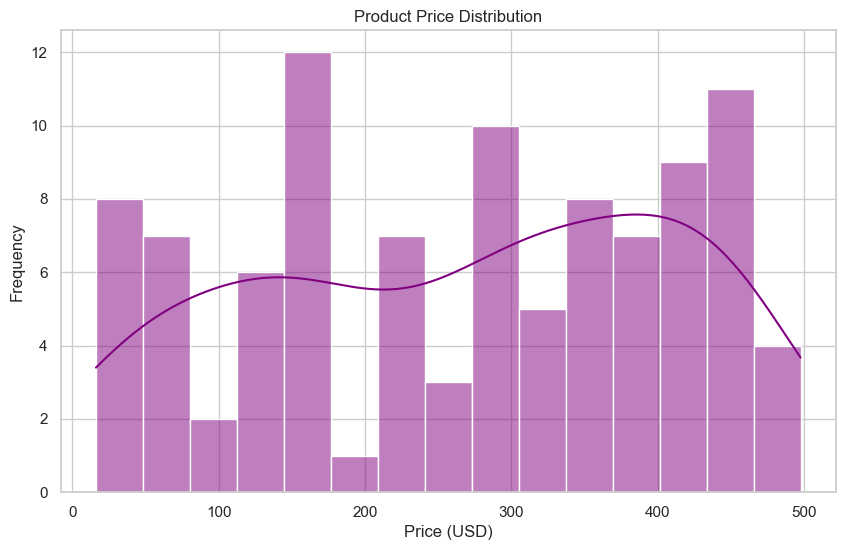

In [103]:
# Price distribution of products
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True, color="purple", bins=15)
plt.title("Product Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

C:\Users\MYPC\AppData\Local\Temp\ipykernel_22372\2771382733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="rocket")


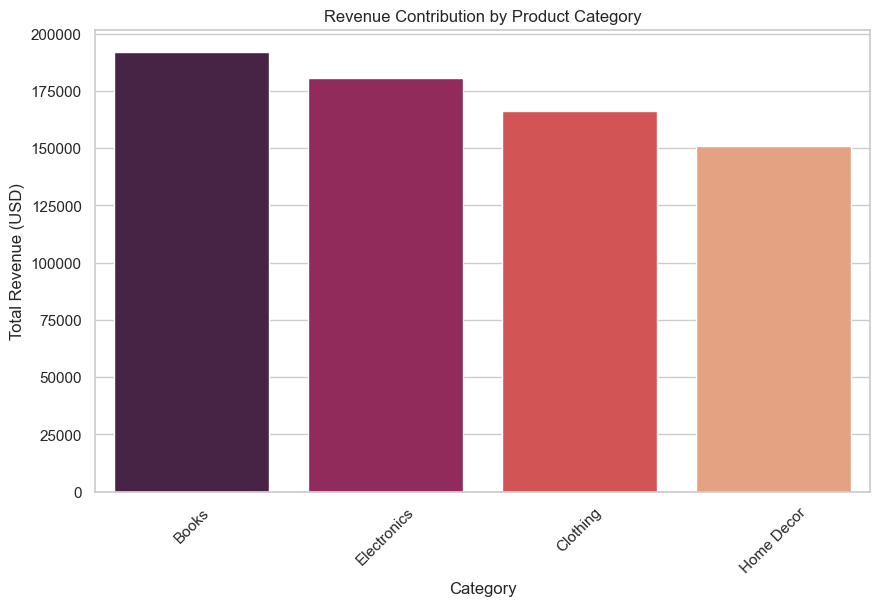

In [106]:
# Revenue contribution by category 
merged_data = transactions.merge(products, on='ProductID')
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="rocket")
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()